# Project-PRCP-1013-WalkRunClass
#Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

Multi-layer neural networks will be trained and evaluated based on data from Run or Walk Reduced dataset.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU

In [4]:
df=pd.read_csv('Walkrun.csv')

In [5]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,30-06-2017,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,30-06-2017,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,30-06-2017,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,30-06-2017,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,30-06-2017,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
df['time_con']=pd.to_datetime(df['time'],format='%H:%M:%S:%f')

In [8]:
df['hour']=df['time_con'].dt.hour
df['minute']=df['time_con'].dt.minute
df['second']=df['time_con'].dt.second

In [9]:
df['date']=pd.to_datetime(df['date'])

C:\Users\PREETHI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PREETHI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PREETHI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PREETHI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-07-2017' in DD/MM/YYYY format. Provide format o

In [10]:
df['nthday']=df['date'].dt.dayofweek

In [11]:
df['dayofweek']=df['date'].dt.day_name()

In [12]:
df['day']=df['date'].dt.day

In [13]:
df['Month']=df['date'].dt.month

In [14]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


<AxesSubplot:xlabel='hour', ylabel='count'>

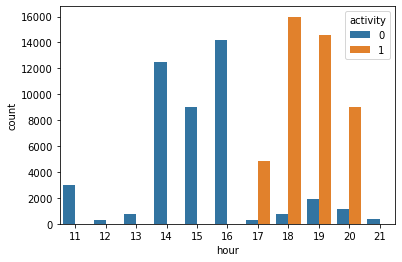

In [15]:
#univarite analysis
sns.countplot(x=df['hour'],hue=df['activity'])

<AxesSubplot:xlabel='minute', ylabel='count'>

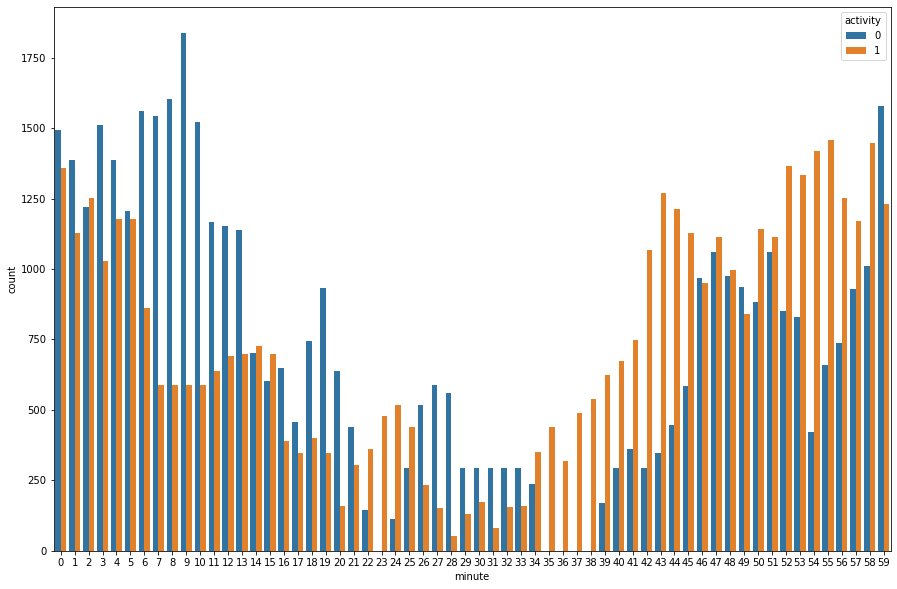

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['minute'],hue=df['activity'])

<AxesSubplot:xlabel='second', ylabel='count'>

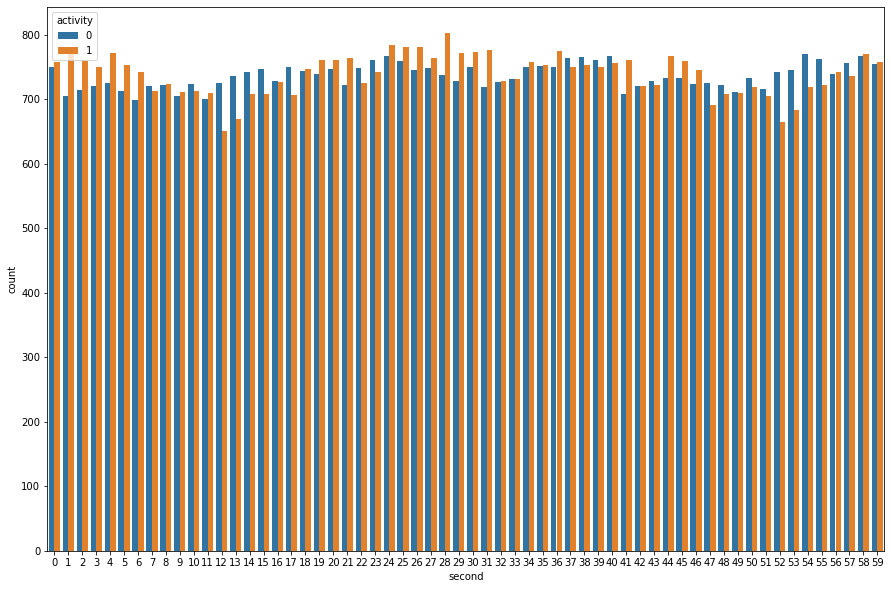

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['second'],hue=df['activity'])

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

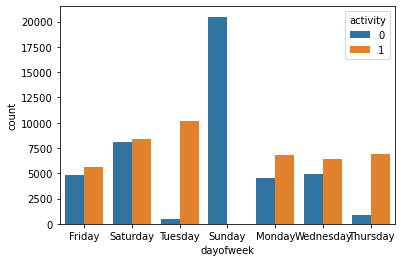

In [18]:
sns.countplot(x=df['dayofweek'],hue=df['activity'])

In [19]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


<AxesSubplot:xlabel='day', ylabel='count'>

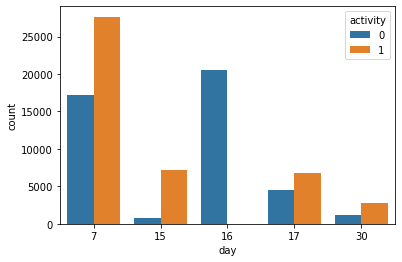

In [20]:
sns.countplot(x=df['day'],hue=df['activity'])

<AxesSubplot:>

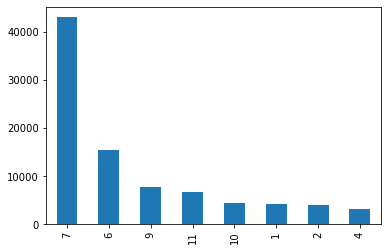

In [21]:
df['Month'].value_counts().plot(kind='bar')

In [22]:
run=df.loc[df['activity']==1]

In [23]:
run.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
755,2017-06-30,20:33:44:257565021,viktor,0,1,1.2842,0.0526,-0.2362,-1.9543,2.4977,1.3038,1900-01-01 20:33:44.257565021,20,33,44,4,Friday,30,6
756,2017-06-30,20:33:44:457401990,viktor,0,1,0.3057,0.4504,-0.1000,1.4730,-0.5391,-2.6030,1900-01-01 20:33:44.457401990,20,33,44,4,Friday,30,6
757,2017-06-30,20:33:44:658038020,viktor,0,1,1.0601,-0.9857,-0.0732,1.4300,-0.9917,-2.3499,1900-01-01 20:33:44.658038020,20,33,44,4,Friday,30,6
758,2017-06-30,20:33:44:858160972,viktor,0,1,-0.1065,-0.7203,0.2003,-0.4013,0.4240,3.0591,1900-01-01 20:33:44.858160972,20,33,44,4,Friday,30,6
759,2017-06-30,20:33:45:57991981,viktor,0,1,1.0069,0.3441,-0.2760,-1.6086,2.3222,1.4736,1900-01-01 20:33:45.579919810,20,33,45,4,Friday,30,6


In [24]:
walk=df.loc[df['activity']==0]

In [25]:
walk.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


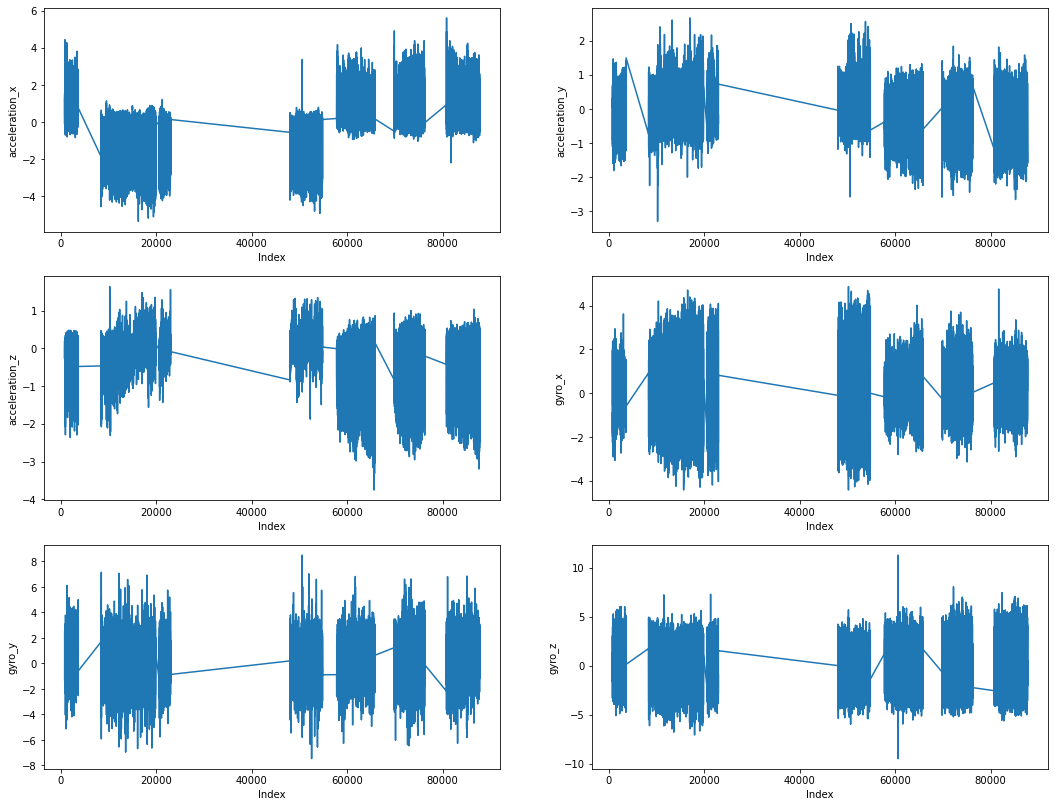

In [26]:
pl_no = 1
plt.figure(figsize=(18, 14))
for column in run.columns[5:11]:
    plt.subplot(3, 2, pl_no)
    sns.lineplot(data=run, x=run.index, y=column)  # Specify the data, x, and y parameters
    plt.xlabel("Index")  # Label the x-axis
    plt.ylabel(column)  # Label the y-axis
    pl_no += 1
plt.show()


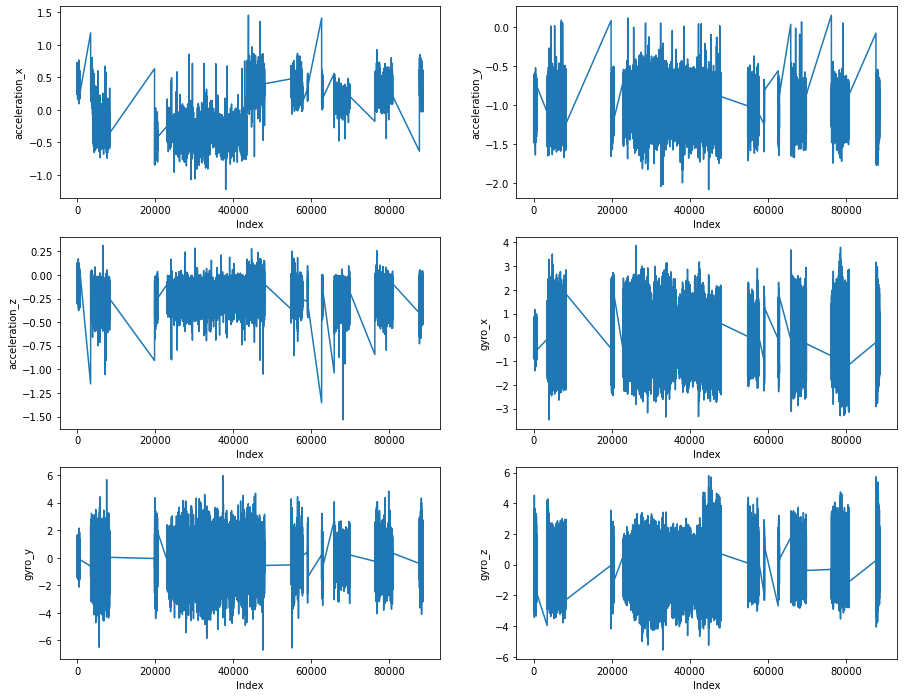

In [27]:
pl_no = 1
plt.figure(figsize=(15, 12))
for column in walk.columns[5:11]:
    plt.subplot(3, 2, pl_no)
    sns.lineplot(data=walk, x=walk.index, y=column)
    plt.xlabel("Index")
    plt.ylabel(column)
    pl_no += 1
plt.show()


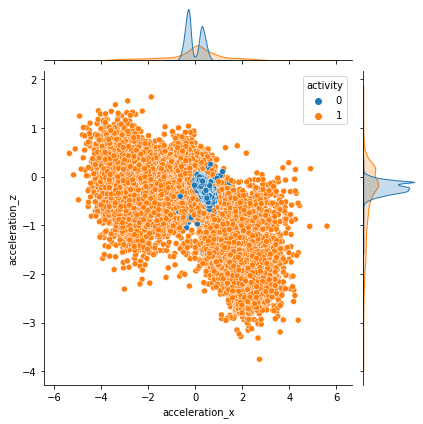

In [28]:
#bivariant analysis
sns.jointplot(y=df.acceleration_z,x=df['acceleration_x'],hue=df.activity)

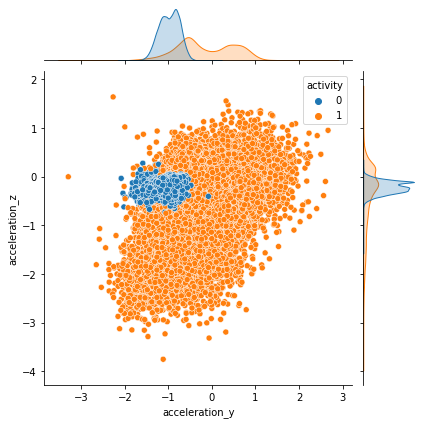

In [29]:
sns.jointplot(y=df.acceleration_z,x=df['acceleration_y'],hue=df.activity)

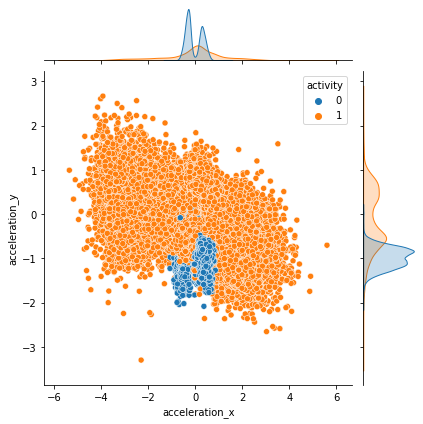

In [30]:
sns.jointplot(x=df.acceleration_x,y=df['acceleration_y'],hue=df.activity)

In [31]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


In [32]:
#dropping unneccesary columns-feature selection
df.drop(['date','time','username','wrist','time_con','dayofweek','day','Month'],axis=1,inplace=True)


In [33]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,13,51,15,4
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,13,51,16,4
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,13,51,16,4
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,13,51,16,4
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,13,51,16,4


In [34]:
cyclic_cols=['hour','minute','second','nthday']
for i in cyclic_cols:
    df[i]=np.sin(df[i])

In [35]:
#train test splits
#considering 80% of data as training data will be using 20%data as testing data.
train_size=int(len(df)*0.8)
train_df=df[:train_size]
test_df=df[train_size:]

In [36]:
scaler=MinMaxScaler() #initiating minmax scaler

In [37]:
X_train=train_df.drop('activity',axis=1)
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.420167,0.670229,0.650288,-0.756802
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.420167,0.670229,-0.287903,-0.756802
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.420167,0.670229,-0.287903,-0.756802
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.420167,0.670229,-0.287903,-0.756802
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.420167,0.670229,-0.287903,-0.756802


In [38]:
X_train_scaled=scaler.fit_transform(X_train)

In [39]:
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.420167,0.670229,0.650288,-0.756802
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.420167,0.670229,-0.287903,-0.756802
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.420167,0.670229,-0.287903,-0.756802
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.420167,0.670229,-0.287903,-0.756802
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.420167,0.670229,-0.287903,-0.756802


In [40]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.547464,0.421921,0.694500,0.469822,0.469670,0.315740,0.707767,0.835151,0.825179,0.108189
1,0.587162,0.364622,0.652454,0.457280,0.468937,0.463068,0.707767,0.835151,0.356061,0.108189
2,0.564515,0.304558,0.709293,0.378310,0.474293,0.339498,0.707767,0.835151,0.356061,0.108189
3,0.551178,0.416709,0.712371,0.489049,0.441955,0.315547,0.707767,0.835151,0.356061,0.108189
4,0.568561,0.396816,0.702564,0.481827,0.495067,0.577079,0.707767,0.835151,0.356061,0.108189


In [41]:
y_train=train_df['activity']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [42]:
X_test=test_df.drop('activity',axis=1)
X_test.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
70870,0.6975,0.7000,-0.5526,-0.8437,0.0453,-0.6307,-0.750987,-0.916522,0.000000,0.909297
70871,2.1604,-0.7054,-1.7276,-0.1344,-1.2329,-3.8290,-0.750987,-0.916522,0.841471,0.909297
70872,-0.1945,-0.4005,0.2431,1.5492,0.5895,1.3939,-0.750987,-0.916522,0.841471,0.909297
70873,1.2948,-1.1655,-1.4757,0.5115,-0.2046,2.2225,-0.750987,-0.916522,0.841471,0.909297
70874,0.4646,0.5443,-0.5110,-1.1969,0.6328,-1.1749,-0.750987,-0.916522,0.841471,0.909297


In [43]:
X_test_scaled=scaler.transform(X_test)

In [44]:
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled_df.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.589629,0.670186,0.593463,0.385489,0.470472,0.426550,0.107792,0.041736,0.500020,1.0
1,0.732249,0.434657,0.375633,0.461719,0.390398,0.272387,0.107792,0.041736,0.920776,1.0
2,0.502666,0.485755,0.740976,0.642658,0.504564,0.524139,0.107792,0.041736,0.920776,1.0
3,0.647861,0.357550,0.422332,0.531134,0.454817,0.564079,0.107792,0.041736,0.920776,1.0
4,0.566923,0.644093,0.601175,0.347530,0.507276,0.400319,0.107792,0.041736,0.920776,1.0


In [45]:
y_test=test_df['activity']
y_test.head()

70870    1
70871    1
70872    1
70873    1
70874    1
Name: activity, dtype: int64

In [46]:
#values into arrays
#converting the values into arrays for faster computation
X_train,y_train=np.array(X_train_scaled_df),np.array(y_train)
X_test,y_test=np.array(X_test_scaled_df),np.array(y_test)

In [47]:
window_size=6
#create empty lists to store the generated sequences
train_X=[]
train_y=[]

#generate the sequence using sliding window
for i in range(len(X_train)-window_size+1):
    window_data = X_train[i:i+window_size]
    target = y_train[i+window_size-1]
    train_X.append(window_data)
    train_y.append(target)

In [48]:
train_y[0]

0

In [49]:
train_X,train_y=np.array(train_X),np.array(train_y)

In [50]:
window_size=6
#create empty lists to store using sliding window
test_X=[]
test_y=[]
#Generate the sequences using sliding window
for i in range(len(X_test)-window_size +1):
    window_data=X_test[i:i+window_size]
    target=y_test[i+window_size-1]
    test_X.append(window_data)
    test_y.append(target)

In [51]:
test_X,test_y=np.array(test_X),np.array(test_y)

In [52]:
train_X=train_X.reshape(train_X.shape[0],window_size,train_X.shape[2])

In [53]:
test_X=test_X.reshape(test_X.shape[0],window_size,test_X.shape[2])

In [54]:
train_X.shape

(70865, 6, 10)

In [55]:
test_X.shape

(17713, 6, 10)

#model creation
#model 1
using single lstm layer for classification


In [56]:
model1=Sequential()

In [57]:
model1.add(LSTM(units=64,input_shape=(window_size,10)))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
history1=model1.fit(train_X,train_y,epochs=10,batch_size=32)

Epoch 1/10
2215/2215 [==============================] - 9s 3ms/step - loss: 0.0535 - accuracy: 0.9805
Epoch 2/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0169 - accuracy: 0.9966
Epoch 3/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0145 - accuracy: 0.9970
Epoch 4/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0141 - accuracy: 0.9971
Epoch 5/10
2215/2215 [==============================] - 7s 3ms/step - loss: 0.0126 - accuracy: 0.9974
Epoch 6/10
2215/2215 [==============================] - 7s 3ms/step - loss: 0.0119 - accuracy: 0.9975
Epoch 7/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0107 - accuracy: 0.9979
Epoch 8/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0100 - accuracy: 0.9979
Epoch 9/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 10/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.00

In [59]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19200     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 19265 (75.25 KB)
Trainable params: 19265 (75.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
#plot the validdation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    
    """
    loss = history.history['loss']
    accuracy=history.history['accuracy']
    epochs=range(len(history.history['loss']))
    
    #plot loss
    plt.plot(epochs,loss,label='training_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    #plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label='training_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

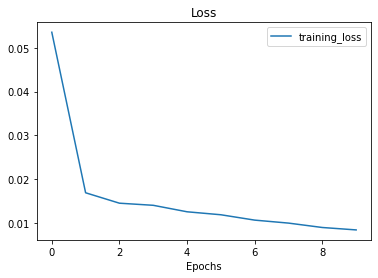

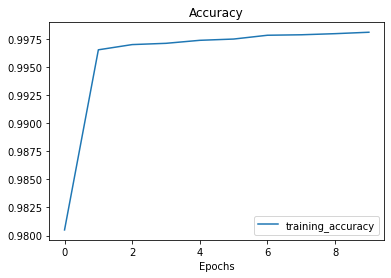

In [61]:
plot_loss_curves(history1)

In [62]:
model1_pred=model1.predict(test_X)

554/554 [==============================] - 1s 2ms/step


In [63]:
model1_pred

array([[9.9804652e-01],
       [9.9547154e-01],
       [9.9843717e-01],
       ...,
       [8.3930390e-05],
       [6.9363246e-05],
       [1.8927619e-04]], dtype=float32)

In [64]:
model1_pred.shape

(17713, 1)

In [65]:
pred=np.where(model1_pred<0.5,0,1)

In [66]:
pred.shape

(17713, 1)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(y_test[5:],pred))

[[ 5428     8]
 [  414 11863]]


In [69]:
print(classification_report(y_test[5:],pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5436
           1       1.00      0.97      0.98     12277

    accuracy                           0.98     17713
   macro avg       0.96      0.98      0.97     17713
weighted avg       0.98      0.98      0.98     17713



#model2
GRU is another type of lstm model and it as faster computation startegy compared to normal LSTM model

In [70]:
#model creation
model2=Sequential()

In [71]:
#model creation
model2=Sequential()

#adding layers to model2
model2.add(GRU(units=64, input_shape=(window_size, 10)))
model2.add(Dense(units=1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#fitting the model
history2=model2.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting on the test data
model2_pred=model2.predict(test_X)

#segregating into classes
pred2=np.where(model2_pred>0.5,1,0)

#printing the the matrics
print("\n")
print("metrics on test data")
print(confusion_matrix(y_test[5:],pred2))
print('\n')
print(classification_report(y_test[5:],pred2))

Epoch 1/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0537 - accuracy: 0.9805
Epoch 2/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0159 - accuracy: 0.9970
Epoch 3/10
2215/2215 [==============================] - 7s 3ms/step - loss: 0.0142 - accuracy: 0.9970
Epoch 4/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0129 - accuracy: 0.9973
Epoch 5/10
2215/2215 [==============================] - 7s 3ms/step - loss: 0.0114 - accuracy: 0.9975
Epoch 6/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 7/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0083 - accuracy: 0.9982
Epoch 8/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 9/10
2215/2215 [==============================] - 8s 4ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 10/10
554/554 [==============================] - 1s 2ms/step


metrics on t

In [72]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                14592     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14657 (57.25 KB)
Trainable params: 14657 (57.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


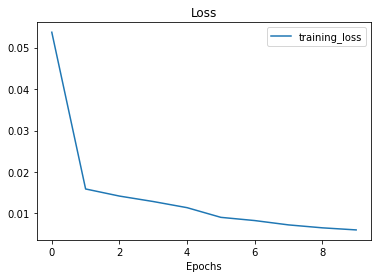

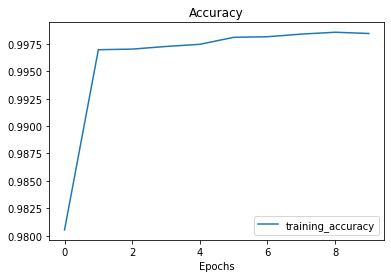

In [73]:
plot_loss_curves(history2)

#model3
model creation using multiple LSTM layers

In [74]:
#multilayer model
model3=Sequential()
#adding multiple layers
model3.add(LSTM(units=128,input_shape=(window_size,10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64,input_shape=(window_size,10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=32,input_shape=(window_size,10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=32,input_shape=(window_size,10)))
model3.add(Dropout(0.2))
model3.add(Dense(units=1,activation='sigmoid'))


#compiling the model
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model
history3=model3.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting on the test data
model3_pred=model3.predict(test_X)

#segregating into classes
pred3=np.where(model3_pred>0.5,1,0)

print("\n")
print("metrics on test data")
print(confusion_matrix(y_test[5:],pred3))
print('\n')
print(classification_report(y_test[5:],pred3))

Epoch 1/10
2215/2215 [==============================] - 42s 15ms/step - loss: 0.0522 - accuracy: 0.9806
Epoch 2/10
2215/2215 [==============================] - 34s 15ms/step - loss: 0.0167 - accuracy: 0.9966
Epoch 3/10
2215/2215 [==============================] - 34s 15ms/step - loss: 0.0151 - accuracy: 0.9968
Epoch 4/10
2215/2215 [==============================] - 34s 15ms/step - loss: 0.0136 - accuracy: 0.9973
Epoch 5/10
2215/2215 [==============================] - 34s 15ms/step - loss: 0.0110 - accuracy: 0.9976
Epoch 6/10
2215/2215 [==============================] - 33s 15ms/step - loss: 0.0086 - accuracy: 0.9981
Epoch 7/10
2215/2215 [==============================] - 33s 15ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 8/10
2215/2215 [==============================] - 33s 15ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 9/10
2215/2215 [==============================] - 33s 15ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 10/10
554/554 [==============================] - 4s 5ms/st

In [75]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 128)            71168     
                                                                 
 dropout (Dropout)           (None, 6, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 6, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 6, 32)             12416     
                                                                 
 dropout_2 (Dropout)         (None, 6, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 32)               

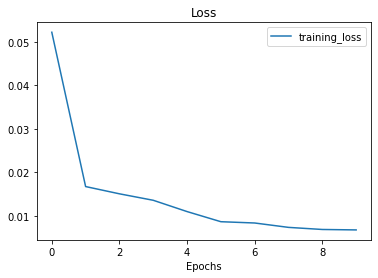

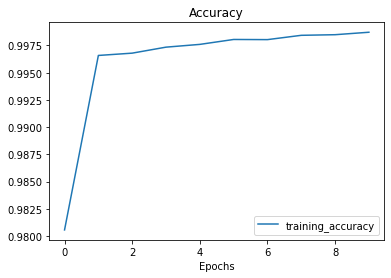

In [76]:
plot_loss_curves(history3)

In [79]:
#model creation
model4=Sequential()

#adding the multiple layers to model
model4.add(GRU(units=128, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=64, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=32, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=32, input_shape=(window_size, 10)))
model4.add(Dropout(0.2))
model4.add(Dense(units=1,activation='sigmoid'))

#compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#fitting the model
history4=model4.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting the model
model4_pred=model4.predict(test_X)

#segregating into classes
pred4=np.where(model4_pred>0.5,1,0)

#metrics on test data
print('\n')
print('metrics on test data')
print(confusion_matrix(y_test[5:],pred4))
print('\n')
print(classification_report(y_test[5:],pred4))

Epoch 1/10
2215/2215 [==============================] - 36s 13ms/step - loss: 0.0422 - accuracy: 0.9852
Epoch 2/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0129 - accuracy: 0.9975
Epoch 3/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0120 - accuracy: 0.9975
Epoch 4/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0095 - accuracy: 0.9980
Epoch 5/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0080 - accuracy: 0.9983
Epoch 6/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0077 - accuracy: 0.9983
Epoch 7/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 8/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 9/10
2215/2215 [==============================] - 28s 13ms/step - loss: 0.0062 - accuracy: 0.9986
Epoch 10/10
554/554 [==============================] - 3s 3ms/st

In [80]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 6, 128)            53760     
                                                                 
 dropout_11 (Dropout)        (None, 6, 128)            0         
                                                                 
 gru_9 (GRU)                 (None, 6, 64)             37248     
                                                                 
 dropout_12 (Dropout)        (None, 6, 64)             0         
                                                                 
 gru_10 (GRU)                (None, 6, 32)             9408      
                                                                 
 dropout_13 (Dropout)        (None, 6, 32)             0         
                                                                 
 gru_11 (GRU)                (None, 32)               

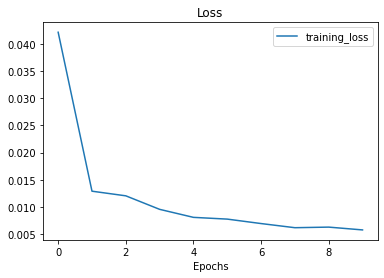

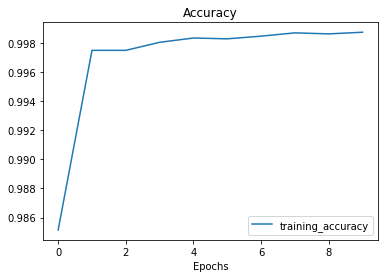

In [81]:
plot_loss_curves(history4)


conclusion
Task 1:-Prepare a complete data analysis report on the given data.

        univariant and bivariant analysis done on the data

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

        created 4 different models and checked the different accuracies of all models.

        found that the GRU model is performing well in predicting the different classes.

        the prediction on the testing data is performing well when the window size is more than 1

